In [40]:
import PyPDF2
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# reading pdf file
pdf = open("Commonwealth Games 2018 – Overview by AffairsCloud.pdf",'rb')
pr = PyPDF2.PdfFileReader(pdf)
pg3 = (pr.getPage(2).extract_text())
# extracting required information
pg3.find('Medals won by India:')

In [102]:
# creating pandas dataframe
data=pg3[1704+len('Medals won by India:')::].replace('Table Tennis','TableTennis').replace('Para Powerlifting','ParaPowerlifting').split()
event = []
gold = []
silver = []
bronze = []
total = []
for i in range(6,len(data),6) :
    event.append(data[i])
    gold.append(data[i+1])
    silver.append(data[i+2])
    bronze.append(data[i+3])
    total.append(data[i+4])
medals = pd.DataFrame([event,gold,silver,bronze,total]).T
medals.columns = ['event','gold','silver','bronze','total']
medals.gold = medals.gold.astype('int')
medals.silver = medals.silver.astype('int')
medals.bronze = medals.bronze.astype('int')
medals.total = medals.total.astype('int')

In [140]:
plot1 = go.Figure(data=[go.Bar(
    name='Gold',
    x=medals['event'],
    y=medals['gold'],
    text=medals['gold']
),
    go.Bar(name='Silver',
    x=medals['event'],
    y=medals['silver'],
    text=medals['silver']
),
go.Bar(name='Bronze',
    x=medals['event'],
    y=medals['bronze'],
    text=medals['bronze']
),
go.Bar(name='Total',
    x=medals['event'],
    y=medals['total'],
    text=medals['total']
),
                    
])

In [152]:
plot1.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=list([
                dict(label="",
                    method="update",
                    args=[{"visible": [False]},
                        {"title": ""}]),
                dict(label="Gold Medals Won",
                    method="update",
                    args=[{"visible": [True, False,False,False,False,False]},
                        {"title": "Gold Medals Won by India in Commonwealth Games 2018",
                            }]),
                dict(label="Silver Medals Won",
                    method="update",
                    args=[{"visible": [False,True,False,False,False,False]},
                        {"title": "Silver Medals Won by India in Commonwealth Games 2018",
                            }]),
                dict(label="Bronze Medals Won",
                    method="update",
                    args=[{"visible": [False,False,True,False,False]},
                        {"title": "Bronze Medals Won by India in Commonwealth Games 2018",
                            }]),
                dict(label="Total Medals Won",
                    method="update",
                    args=[{"visible": [False,False,False,True,False]},
                        {"title": "Total Medals Won by India in Commonwealth Games 2018",
                            }]),

     ]))])

In [151]:
won = pd.DataFrame([medals.total.sum()],index=['India'])
won.columns = ['Total_won']

pe.bar(
    x=won.index,
    y=won['Total_won'],L
    text=won['Total_won'],title='Overall Medals won by India in Commonwealth Games 2018')

In [153]:
plot1.show()

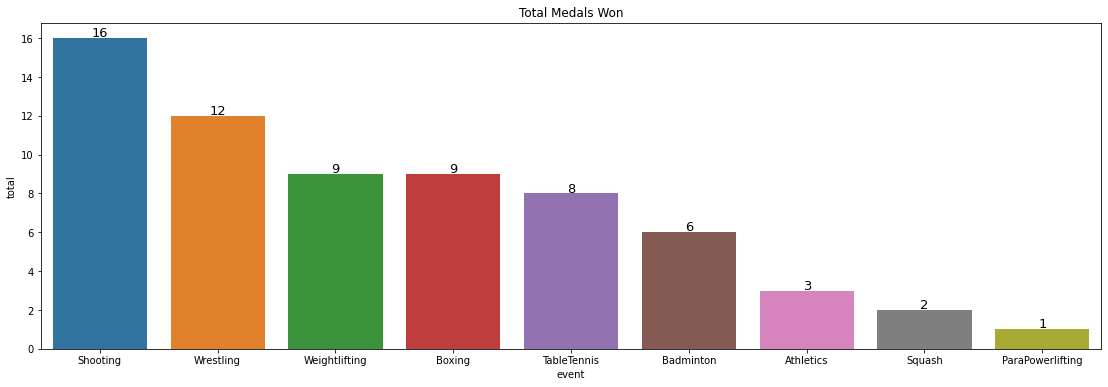

In [97]:
plt.figure(figsize=(19,6))
chart = sns.barplot(x=medals.event,y=medals.total)
chart.set_title('Total Medals Won')
chart.set_xticklabels(chart.get_xticklabels())
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

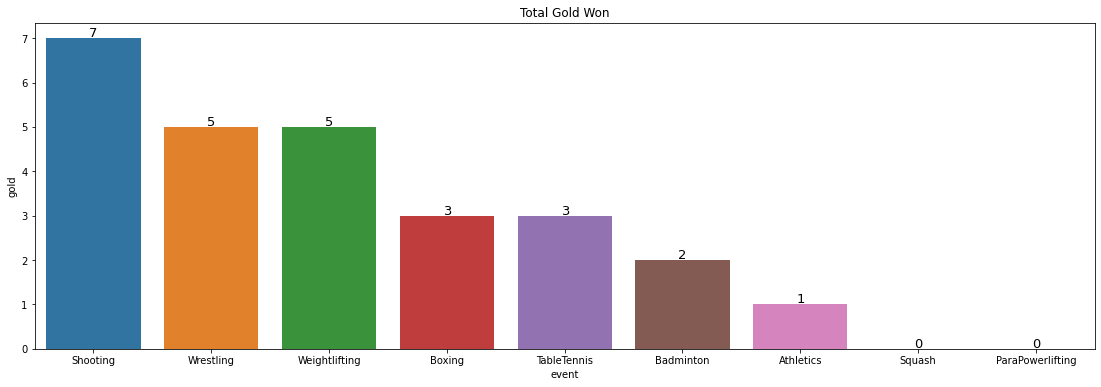

In [98]:
plt.figure(figsize=(19,6))
chart = sns.barplot(x=medals.event,y=medals.gold)
chart.set_title('Total Gold Won')
chart.set_xticklabels(chart.get_xticklabels())
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

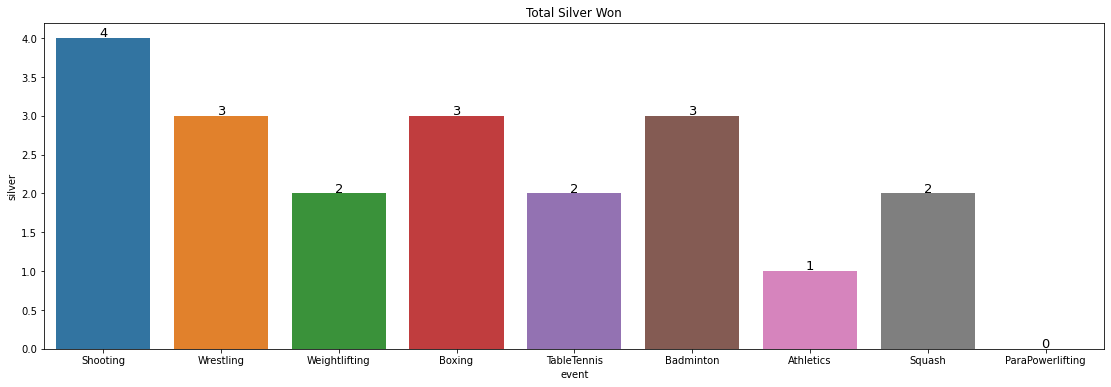

In [99]:
plt.figure(figsize=(19,6))
chart = sns.barplot(x=medals.event,y=medals.silver)
chart.set_title('Total Silver Won')
chart.set_xticklabels(chart.get_xticklabels())
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

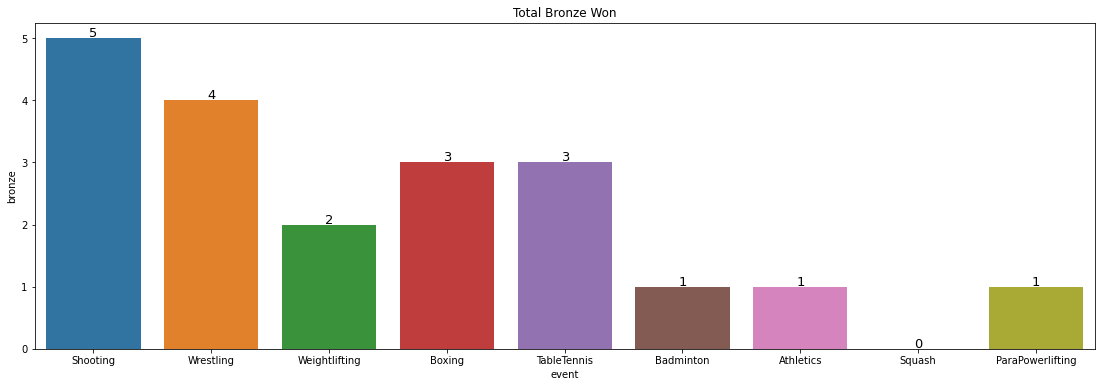

In [100]:
plt.figure(figsize=(19,6))
chart = sns.barplot(x=medals.event,y=medals.bronze)
chart.set_title('Total Bronze Won')
chart.set_xticklabels(chart.get_xticklabels())
# annotation here
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=13, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()